In [2]:
# Importing all necessary libraries. Others will be imported also when needed
import pandas as pd
import pandas.io.sql as sqlio
import numpy as np
import pymongo
import requests

In [3]:
# Fetching my data from the file's source.
res = requests.get("https://data.gov.ie/dataset/827b9a67-8a1c-481a-ab14-bf3ff70d645b/resource/11dc0e61-4bf9-4781-a6c4-cd9f725a5674/download/fishers_cattle.json")

## Loading into and fetching data from MongoDB

In [4]:
# Connecting my machine to the MongoDB database to store my data
myclient = pymongo.MongoClient("mongodb://localhost:27017/")

mydb = myclient["DAP_Akinwale"]
mycol = mydb["cattle"]

In [5]:
# Inputing my data into the MongoDB database
many_ids = mycol.insert_many(res.json()).inserted_ids

In [6]:
# Fetching my data back from the MongoDB database.
dff=[]
for i in mycol.find():
    dff.append(i)
# Strcturing the data into a dataframe after getting it.  
df = pd.DataFrame(dff)

In [7]:
# Printing out the first five records.
df.head()

,_id,YEAR,LOCATION,CATTLE_BREED_TYPE,CATTLE_GENDER,CATTLE_AGE_0_6,CATTLE_AGE_6_6,CATTLE_AGE_6_12,CATTLE_AGE_12_18,CATTLE_AGE_18_24,CATTLE_AGE_24_30,CATTLE_AGE_30_36,CATTLE_AGE_36_PLUS
0,61cc73318344f513d0d8f017,2014,Boyne,BEEF,C,0,0,0,3,199,504,3929,57144
1,61cc73318344f513d0d8f018,2020,Doonbeg,BEEF,C,0,0,0,0,11,41,312,5863
2,61cc73318344f513d0d8f019,2019,Ilen,BEEF,C,0,0,0,0,12,78,473,6794
3,61cc73318344f513d0d8f01a,2019,Boyne,BEEF,F,1477,7816,33166,9312,35995,7049,7915,1680
4,61cc73318344f513d0d8f01b,2014,Boyne,BEEF,F,1490,8008,33775,9525,36253,7203,8138,1764


## Cleaning and Transformation processes

In [9]:
# Getting the total number of cells in the data
no_of_cells = np.product(df.shape)
print(no_of_cells)

45539


In [33]:
# Creating and index column to replace the _id column with values that were autogenerated while fetching the data.
df2 = df.reset_index()
df2

,index,_id,YEAR,LOCATION,CATTLE_BREED_TYPE,CATTLE_GENDER,CATTLE_AGE_0_6,CATTLE_AGE_6_6,CATTLE_AGE_6_12,CATTLE_AGE_12_18,CATTLE_AGE_18_24,CATTLE_AGE_24_30,CATTLE_AGE_30_36,CATTLE_AGE_36_PLUS
0,0,61cc73318344f513d0d8f017,2014,Boyne,BEEF,C,0,0,0,3,199,504,3929,57144
1,1,61cc73318344f513d0d8f018,2020,Doonbeg,BEEF,C,0,0,0,0,11,41,312,5863
2,2,61cc73318344f513d0d8f019,2019,Ilen,BEEF,C,0,0,0,0,12,78,473,6794
3,3,61cc73318344f513d0d8f01a,2019,Boyne,BEEF,F,1477,7816,33166,9312,35995,7049,7915,1680
4,4,61cc73318344f513d0d8f01b,2014,Boyne,BEEF,F,1490,8008,33775,9525,36253,7203,8138,1764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3498,3498,61cc73318344f513d0d8fdc1,2018,Boyne,BEEF,F,1486,6379,37858,11092,39515,5053,5677,1427
3499,3499,61cc73318344f513d0d8fdc2,2018,Vartry,DAIRY,C,0,0,0,0,3,71,342,1668
3500,3500,61cc73318344f513d0d8fdc3,2017,Doonbeg,BEEF,F,135,527,3122,414,1632,215,523,166
3501,3501,61cc73318344f513d0d8fdc4,2015,Doonbeg,BEEF,F,135,513,3120,418,1623,210,519,163


In [36]:
# Removing the "_id" column to make our data look better
df3 = df2.drop('_id',axis=1)
df3

,index,YEAR,LOCATION,CATTLE_BREED_TYPE,CATTLE_GENDER,CATTLE_AGE_0_6,CATTLE_AGE_6_6,CATTLE_AGE_6_12,CATTLE_AGE_12_18,CATTLE_AGE_18_24,CATTLE_AGE_24_30,CATTLE_AGE_30_36,CATTLE_AGE_36_PLUS
0,0,2014,Boyne,BEEF,C,0,0,0,3,199,504,3929,57144
1,1,2020,Doonbeg,BEEF,C,0,0,0,0,11,41,312,5863
2,2,2019,Ilen,BEEF,C,0,0,0,0,12,78,473,6794
3,3,2019,Boyne,BEEF,F,1477,7816,33166,9312,35995,7049,7915,1680
4,4,2014,Boyne,BEEF,F,1490,8008,33775,9525,36253,7203,8138,1764
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3498,3498,2018,Boyne,BEEF,F,1486,6379,37858,11092,39515,5053,5677,1427
3499,3499,2018,Vartry,DAIRY,C,0,0,0,0,3,71,342,1668
3500,3500,2017,Doonbeg,BEEF,F,135,527,3122,414,1632,215,523,166
3501,3501,2015,Doonbeg,BEEF,F,135,513,3120,418,1623,210,519,163


In [38]:
# Getting the number of missing values per column
Null_values = df.isnull().sum()
print(Null_values)

YEAR                  0
LOCATION              0
CATTLE_BREED_TYPE     0
CATTLE_GENDER         0
CATTLE_AGE_0_6        0
CATTLE_AGE_6_6        0
CATTLE_AGE_6_12       0
CATTLE_AGE_12_18      0
CATTLE_AGE_18_24      0
CATTLE_AGE_24_30      0
CATTLE_AGE_30_36      0
CATTLE_AGE_36_PLUS    0
dtype: int64


In [39]:
# Inspecting the properties of all the columns in the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3503 entries, 0 to 3502
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   YEAR                3503 non-null   int64 
 1   LOCATION            3503 non-null   object
 2   CATTLE_BREED_TYPE   3503 non-null   object
 3   CATTLE_GENDER       3503 non-null   object
 4   CATTLE_AGE_0_6      3503 non-null   int64 
 5   CATTLE_AGE_6_6      3503 non-null   int64 
 6   CATTLE_AGE_6_12     3503 non-null   int64 
 7   CATTLE_AGE_12_18    3503 non-null   int64 
 8   CATTLE_AGE_18_24    3503 non-null   int64 
 9   CATTLE_AGE_24_30    3503 non-null   int64 
 10  CATTLE_AGE_30_36    3503 non-null   int64 
 11  CATTLE_AGE_36_PLUS  3503 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 328.5+ KB


In [40]:
# Checking for the datatypes of the data, to confirm they are appropriate for analysis purposes.
df.dtypes

YEAR                   int64
LOCATION              object
CATTLE_BREED_TYPE     object
CATTLE_GENDER         object
CATTLE_AGE_0_6         int64
CATTLE_AGE_6_6         int64
CATTLE_AGE_6_12        int64
CATTLE_AGE_12_18       int64
CATTLE_AGE_18_24       int64
CATTLE_AGE_24_30       int64
CATTLE_AGE_30_36       int64
CATTLE_AGE_36_PLUS     int64
dtype: object

## Exploratory Data Analysis

In [15]:
# Importing more libraries, this time for Exploratory Data Analysis (EDA) purposes.
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
import plotly.graph_objects as go
import seaborn as sns

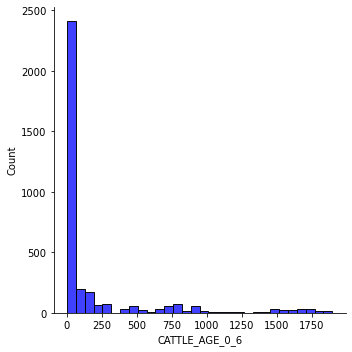

In [23]:
# Making a distribution of cattles aged between 0 to 6 weeks. 
sns.displot(df['CATTLE_AGE_0_6'],bins=30,kde=False,color='blue')

<AxesSubplot:xlabel='CATTLE_GENDER', ylabel='count'>

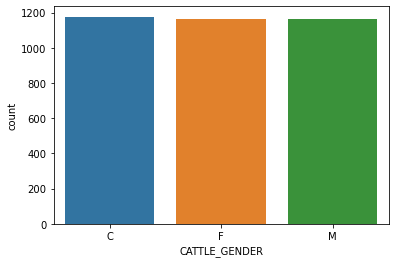

In [41]:
# Showing how the total number of cattle is distributed based on their gender. 
sns.countplot(x='CATTLE_GENDER',data=df3)

In [42]:
# Converting our structured data and saving it as csv format to be able to view it in a structured format.
df3.to_csv (r'C://Users//35389//cattle_data.csv', index = None)

## Inserting data into PostgreSQL

In [26]:
!pip install psycopg2
import psycopg2

In [112]:
import psycopg2
try:
    dbConnection = psycopg2.connect(
        user = "postgres",
        password = "#Walesunday2021",
        host = "localhost",
        port = "5432",
        database = "postgres")
    dbConnection.set_isolation_level(0) # AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    dbCursor.execute('CREATE DATABASE Akinwale_data;')
    dbCursor.close()
except (Exception , psycopg2.Error) as dbError :
    print ("Error while connecting to PostgreSQL", dbError)
finally:
    if dbConnection in locals(): 
        dbConnection.close()

Error while connecting to PostgreSQL database "akinwale_data" already exists



In [113]:
conn = psycopg2.connect(database="akinwale_data",
                        user='postgres', password='#Walesunday2021',
                        host='localhost', port='5432'
)

conn.autocommit = True
cursor = conn.cursor()


sql = '''CREATE TABLE AkinwaleO(YEAR int PRIMARY KEY, 
LOCATION text, 
CATTLE_BREED_TYPE text,  
CATTLE_GENDER text, 
CATTLE_AGE_0_6 int, 
CATTLE_AGE_6_6 int, 
CATTLE_AGE_6_12 int, 
CATTLE_AGE_12_18 int, 
CATTLE_AGE_18_24 int, 
CATTLE_AGE_24_30 int, 
CATTLE_AGE_30_36 int, 
CATTLE_AGE_36_PLUS int
);'''

cursor.execute(sql)

DuplicateTable: relation "akinwaleo" already exists


In [127]:
sql2 = '''COPY akinwaleo(YEAR, LOCATION, CATTLE_BREED_TYPE, CATTLE_GENDER, CATTLE_AGE_0_6, CATTLE_AGE_6_6, CATTLE_AGE_6_12, CATTLE_AGE_12_18, CATTLE_AGE_18_24, CATTLE_AGE_24_30, CATTLE_AGE_30_36, CATTLE_AGE_36_PLUS)
FROM 'r'C://Users//35389//cattle_data.csv'
DELIMITER ','
CSV HEADER;'''

cursor.execute(sql2)


SyntaxError: syntax error at or near "C"
LINE 2: FROM 'r'C://Users//35389//cattle_data.csv'
                ^


In [65]:
sql3 = '''select * from details
;'''
cursor.execute(sql3)
for i in cursor.fetchall():
    print(i)

conn.commit()
conn.close()

SyntaxError: syntax error at or near ";"
LINE 13: );
          ^


In [130]:
import csv

try:
    dbConnection = psycopg2.connect(
        user = "postgres",
        password = "#Walesunday2021",
        host = "localhost",
        port = "5432",
        database = "akinwale_data"
    )
    dbConnection.set_isolation_level(0) # AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    insertString = "INSERT INTO akinwaleo VALUES(TO_TIMESTAMP('{}', 'DD/MM/YYYY HH24:mi'),"+"{},"*12+"{})"
    with open('C://Users//35389//cattle_data.csv', 'r') as f: # ensure you chang
        reader = csv.reader(f)
        next(reader) # skip the header
        for row in reader:
            dbCursor.execute(insertString.format(*row))
    dbConnection.commit()
    dbCursor.close()
except (Exception , psycopg2.Error) as dbError :
    print ("Error:", dbError)
finally:
    if dbConnection in locals(): 
        dbConnection.close()

Error: Replacement index 13 out of range for positional args tuple
